In [1]:
import pandas as pd
import geopandas as gpd
import re
import matplotlib.pyplot as plt
from shapely.geometry import Point
%pylab inline
import shapely

Populating the interactive namespace from numpy and matplotlib


In [147]:
import urllib
import requests
url = "https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=Shapefile"
urllib.request.urlretrieve(url, "file1.gz")


('file1.gz', <http.client.HTTPMessage at 0x7f5717bcc5c0>)

In [152]:
!unzip file1.gz


Archive:  file1.gz
  inflating: geo_export_bd8e60aa-e017-42c5-9839-a28bd85c3af1.dbf  
  inflating: geo_export_bd8e60aa-e017-42c5-9839-a28bd85c3af1.shp  
  inflating: geo_export_bd8e60aa-e017-42c5-9839-a28bd85c3af1.shx  
  inflating: geo_export_bd8e60aa-e017-42c5-9839-a28bd85c3af1.prj  


In [2]:
gdf = gpd.GeoDataFrame.from_file("geo_export_bd8e60aa-e017-42c5-9839-a28bd85c3af1.shp")

In [3]:


df = pd.read_csv('df_1850.csv')

In [4]:
df_50 = df[df['validSince'] == 1850]

In [5]:
df_51 = df[df['validSince'] == 1851]

In [6]:
df_52 = df[df['validSince'] == 1852]

In [7]:
df_53 = df[df['validSince'] == 1853]

In [8]:
df_54 = df[df['validSince'] == 1854]

In [9]:
df_55 = df[df['validSince'] == 1855]

In [10]:
df_56 = df[df['validSince'] == 1856]

In [11]:
df_57 = df[df['validSince'] == 1857]

In [12]:
df_58 = df[df['validSince'] == 1858]

In [13]:
df_59 = df[df['validSince'] == 1859]

In [14]:
cumulative_counts = []
for year in range(1850,1860):
    num_bsn = df[df['validSince'] == year].shape[0]
    cumulative_counts.append(num_bsn)

In [134]:
cumulative_counts

[35735, 38264, 42830, 47526, 51154, 59772, 44375, 46983, 40561, 41426]

In [172]:
plt.xticks?

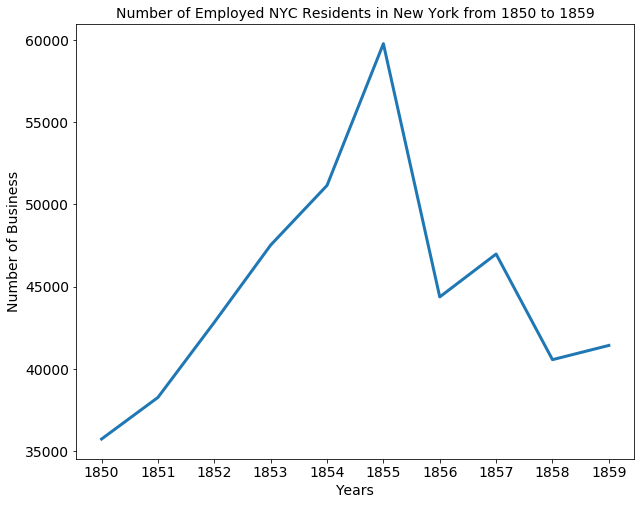

In [780]:
fig, ax = plt.subplots(figsize=(10,8))
plt.plot([year for year in range(1850,1860)],cumulative_counts,linewidth=3.0)
plt.xlabel('Years',fontsize=14.0)
plt.ylabel('Number of Business',fontsize=14.0)
plt.xticks(arange(1850,1860),fontsize=14.0)
plt.yticks(fontsize=14.0)
plt.title('Number of Employed NYC Residents in New York from 1850 to 1859', fontsize=14.0)
plt.savefig('num_business.png')

In [4]:
df.head()

,Unnamed: 0,type,name,validSince,validUntil,geometry,occupation,street_name
0,29803,st:Person,Evans Francis,1850,1851,POINT (-73.97809602320214 40.72495632453228),painter,Avenue C
1,29804,st:Person,Evans George,1850,1851,POINT (-74.00096967816334 40.70906192888833),pilot,Dover Street
2,29805,st:Person,Evans George,1850,1851,POINT (-73.99596713483334 40.711035796115),leather,Hamilton Street
3,29806,st:Person,Evans Henry,1850,1851,POINT (-73.99555206298832 40.740756515198),hatter,West 19th Street
4,29807,st:Person,Evans Henry E,1850,1851,POINT (-74.00723570957776 40.71975891076925),policeman,North Moore Street


In [6]:
# df divide into first name

names_df = df[['name']]

names_df = names_df['name'].str.split(expand= True)

In [7]:
names_df.tail(10)

,0,1,2,3,4,5,6,7,8,9,10,11
448616,Sparks,Alfred,M,None,None,None,None,None,None,None,None,None
448617,Sparks,Charles,None,None,None,None,None,None,None,None,None,None
448618,Sparks,George,None,None,None,None,None,None,None,None,None,None
448619,Sparks,George,A,None,None,None,None,None,None,None,None,None
448620,Sparks,Hervey,None,None,None,None,None,None,None,None,None,None
448621,Sparks,Hiram,C,None,None,None,None,None,None,None,None,None
448622,Sparks,Sylvester,None,None,None,None,None,None,None,None,None,None
448623,Sparks,William,II,None,None,None,None,None,None,None,None,None
448624,Sparling,Thomas,None,None,None,None,None,None,None,None,None,None
448625,Sparmann,Charles,None,None,None,None,None,None,None,None,None,None


In [8]:
names_df.rename(columns={0: 'LastName', 1: 'FirstName', 2: 'MiddleName'}, inplace=True)

In [9]:
names_df.head()

,LastName,FirstName,MiddleName,3,4,5,6,7,8,9,10,11
0,Evans,Francis,None,None,None,None,None,None,None,None,None,None
1,Evans,George,None,None,None,None,None,None,None,None,None,None
2,Evans,George,None,None,None,None,None,None,None,None,None,None
3,Evans,Henry,None,None,None,None,None,None,None,None,None,None
4,Evans,Henry,E,None,None,None,None,None,None,None,None,None


In [28]:
names_df[['FirstName']].to_csv('firstNames_1850.csv')

In [29]:
name_df = names_df[['FirstName']]

In [10]:
fullnames_df = names_df[['LastName', 'FirstName']]
fullnames_df.head()

,LastName,FirstName
0,Evans,Francis
1,Evans,George
2,Evans,George
3,Evans,Henry
4,Evans,Henry


In [11]:
df[['validSince']].head()

,validSince
0,1850
1,1850
2,1850
3,1850
4,1850


In [12]:
fullnames_year = pd.concat([fullnames_df,df[['validSince','occupation', 'geometry']]],axis=1)

In [13]:
fullnames_year.head()

,LastName,FirstName,validSince,occupation,geometry
0,Evans,Francis,1850,painter,POINT (-73.97809602320214 40.72495632453228)
1,Evans,George,1850,pilot,POINT (-74.00096967816334 40.70906192888833)
2,Evans,George,1850,leather,POINT (-73.99596713483334 40.711035796115)
3,Evans,Henry,1850,hatter,POINT (-73.99555206298832 40.740756515198)
4,Evans,Henry,1850,policeman,POINT (-74.00723570957776 40.71975891076925)


In [14]:
fullnames_year.to_csv('fullnames_year1850s.csv')

In [ ]:
#names cleaning:

names to filter: &,single letter words,numbers,double letter words
clean the words to keep only letters 
re.sub('[^a-zA-Z]+', '', s)

In [73]:
firstName_year['FirstName_clean'] = firstName_year['FirstName'].astype('str').map(lambda x: re.sub('[^a-zA-Z]+', '', x))

In [74]:
filter_null = firstName_year[firstName_year['FirstName_clean'] != '']

In [75]:
firstName_year.shape,filter_null.shape

((448626, 5), (435764, 5))

In [76]:
#filter single letter names and double letter names
filter_null['name_len'] = filter_null['FirstName_clean'].map(lambda x: len(x))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [79]:
clean_names_df = filter_null[filter_null['name_len'] >= 3][['FirstName_clean','validSince','occupation','geometry']]

In [84]:
clean_names_df.rename(columns={'FirstName_clean': 'names'}, inplace=True)

In [92]:
clean_names_df.to_csv('names_clean.csv')

In [122]:
gender_df = pd.read_csv('gender_1850s.csv')

In [123]:
gender_df.head()

,Unnamed: 0,name,proportion_male,proportion_female,gender,year_min,year_max
0,1,Aaron,0.9976,0.0024,male,1800,1825
1,2,Aaron,0.9976,0.0024,male,1800,1825
2,3,Aaron,0.9976,0.0024,male,1800,1825
3,4,Aaron,0.9976,0.0024,male,1800,1825
4,5,Aaron,0.9976,0.0024,male,1800,1825


In [124]:
males = gender_df[gender_df['gender'] == 'male']

In [125]:
males['name'] = males['name'].astype('str').map(lambda x : x.lower())

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [135]:
females['name'].unique()

array([nan], dtype=object)

In [127]:
males_list = males['name'].unique().tolist()

In [137]:
females = gender_df[gender_df['gender'] == 'female']
females['name'] = females['name'].astype('str').map(lambda x : x.lower())

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [138]:
females_list = females['name'].unique().tolist()


In [140]:
female_dict = {k: "female" for k in females_list}

In [145]:
male_dict  = {k: "male" for k in males_list}

In [113]:
clean_names_df.head()

,names,validSince,occupation,geometry
0,Francis,1850,painter,POINT (-73.97809602320214 40.72495632453228)
1,George,1850,pilot,POINT (-74.00096967816334 40.70906192888833)
2,George,1850,leather,POINT (-73.99596713483334 40.711035796115)
3,Henry,1850,hatter,POINT (-73.99555206298832 40.740756515198)
4,Henry,1850,policeman,POINT (-74.00723570957776 40.71975891076925)


In [147]:
gender_dict = male_dict.update(female_dict )

In [150]:
male_dict.update(female_dict )

In [152]:
len(females_list) + len(males_list)

3722

In [167]:
clean_names_df.head()

,names,validSince,occupation,geometry,gender
0,Francis,1850,painter,POINT (-73.97809602320214 40.72495632453228),male
1,George,1850,pilot,POINT (-74.00096967816334 40.70906192888833),male
2,George,1850,leather,POINT (-73.99596713483334 40.711035796115),male
3,Henry,1850,hatter,POINT (-73.99555206298832 40.740756515198),male
4,Henry,1850,policeman,POINT (-74.00723570957776 40.71975891076925),male


In [165]:
clean_names_df['gender'] = clean_names_df['names'].astype('str').map(lambda x: male_dict[x.lower()] if x.lower() in male_dict.keys() else "unknown")

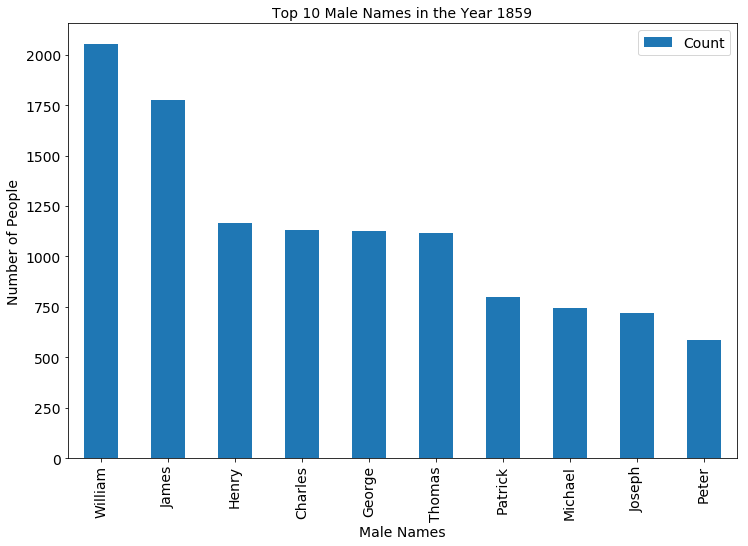

In [200]:
fig,ax= plt.subplots(figsize=(12,8))
clean_names_df[(clean_names_df['validSince'] == 1859) & (clean_names_df['gender'] == "male")][['names','occupation']].groupby(['names']).count().sort_values(by='occupation',ascending=False)[1:11].plot(kind='bar',ax=ax)

plt.xlabel('Male Names',fontsize=14.0)
plt.ylabel('Number of People',fontsize=14.0)

plt.xticks(fontsize=14.0)
plt.yticks(fontsize=14.0)
plt.title('Top 10 Male Names in the Year 1859', fontsize=14.0)
plt.legend(['Count'],fontsize=14.0)
plt.savefig('males_1859.png')

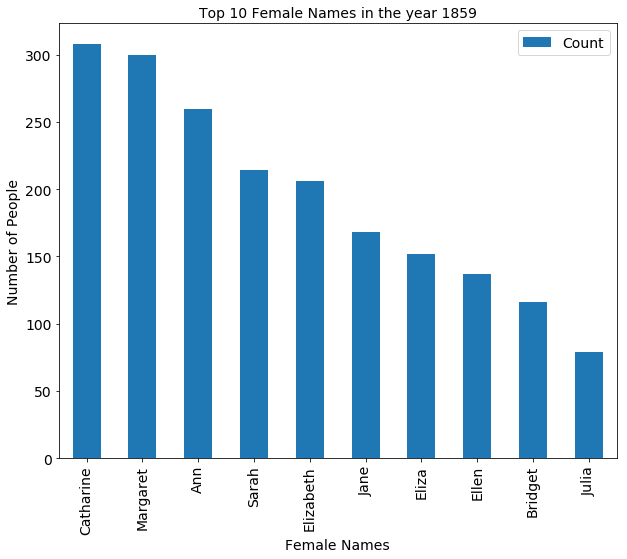

In [190]:
fig,ax= plt.subplots(figsize=(10,8))
clean_names_df[(clean_names_df['validSince'] == 1859) & (clean_names_df['gender'] == "female")][['names','occupation']].groupby(['names']).count().sort_values(by='occupation',ascending=False)[1:11].plot(kind='bar',ax=ax)

plt.xlabel('Female Names',fontsize=14.0)
plt.ylabel('Number of People',fontsize=14.0)

plt.xticks(fontsize=14.0)
plt.yticks(fontsize=14.0)
plt.title('Top 10 Female Names in the year 1859', fontsize=14.0)
plt.legend(['Count'],fontsize=14.0)
plt.savefig('females_1859.png')

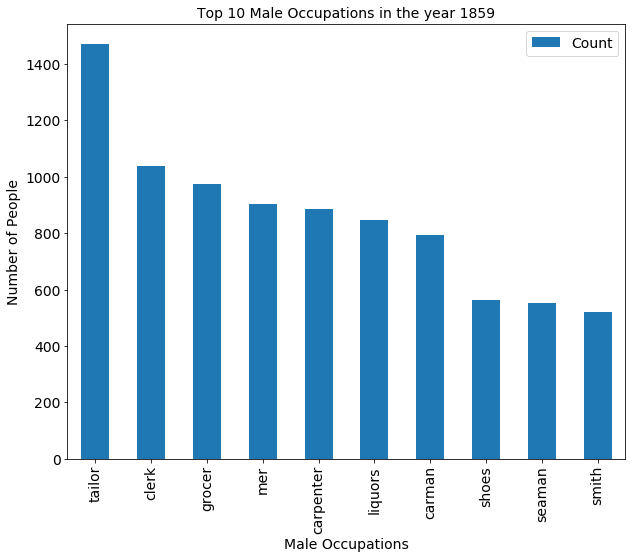

In [199]:
fig,ax= plt.subplots(figsize=(10,8))
clean_names_df[(clean_names_df['validSince'] == 1859) & (clean_names_df['gender'] == "male")][['names','occupation']].groupby(['occupation']).count().sort_values(by='names',ascending=False)[1:11].plot(kind='bar',ax=ax)

plt.xlabel('Male Occupations',fontsize=14.0)
plt.ylabel('Number of People',fontsize=14.0)

plt.xticks(fontsize=14.0)
plt.yticks(fontsize=14.0)
plt.title('Top 10 Male Occupations in the year 1859', fontsize=14.0)
plt.legend(['Count'],fontsize=14.0)
plt.savefig('males_occu_1859.png')

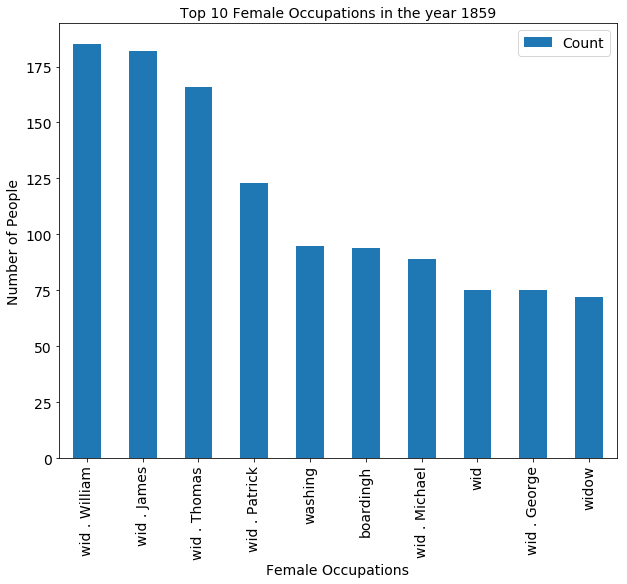

In [193]:
fig,ax= plt.subplots(figsize=(10,8))
clean_names_df[(clean_names_df['validSince'] == 1859) & (clean_names_df['gender'] == "female")][['names','occupation']].groupby(['occupation']).count().sort_values(by='names',ascending=False)[1:11].plot(kind='bar',ax=ax)

plt.xlabel('Female Occupations',fontsize=14.0)
plt.ylabel('Number of People',fontsize=14.0)

plt.xticks(fontsize=14.0)
plt.yticks(fontsize=14.0)
plt.title('Top 10 Female Occupations in the year 1859', fontsize=14.0)
plt.legend(['Count'],fontsize=14.0)
plt.savefig('females_occu_1859.png')

In [180]:
monly = clean_names_df[clean_names_df['gender'] == "male"]
fonly = clean_names_df[clean_names_df['gender'] == "female"]

In [181]:
monly[['gender','validSince']].groupby(['validSince']).count()

,gender
validSince,
1850,28995
1851,30083
1852,33292
1853,37532
1854,40222
1855,48004
1856,33230
1857,35496
1858,29888


In [185]:
fonly[['gender','validSince']].groupby(['validSince']).count()

,gender
validSince,
1850,3007
1851,3424
1852,3536
1853,4389
1854,4677
1855,5798
1856,4747
1857,5211
1858,4533


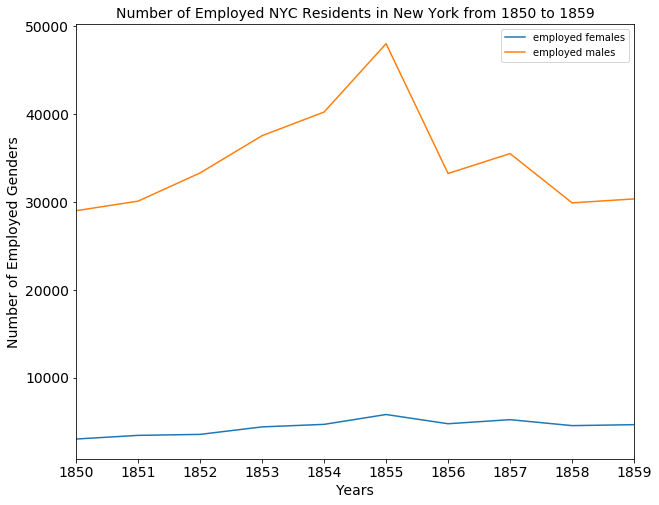

In [198]:
fig, ax = plt.subplots(figsize=(10,8))
#plt.plot([year for year in range(1850,1860)],cumulative_counts,linewidth=3.0)
fonly[['gender','validSince']].groupby(['validSince']).count().plot(ax=ax,label='employed females')
monly[['gender','validSince']].groupby(['validSince']).count().plot(ax=ax,label='employed males')
plt.xlabel('Years',fontsize=14.0)
plt.ylabel('Number of Employed Genders',fontsize=14.0)
plt.xticks(arange(1850,1860),fontsize=14.0)
plt.yticks(fontsize=14.0)
plt.title('Number of Employed NYC Residents in New York from 1850 to 1859', fontsize=14.0)

ax.legend(["employed females", "employed males"]);
plt.savefig('num_business_genders.png')

In [166]:
clean_names_df[clean_names_df['gender'] == "unknown"]























































































































































































































































































































,names,validSince,occupation,geometry,gender
33,Charis,1850,engraver,POINT (-73.98273557424567 40.74542946407767),unknown
90,Mosser,1850,laborer,POINT (-73.98361176252367 40.71829912365533),unknown
129,BROTHERS,1850,watches,POINT (-74.01082076132266 40.707088850343),unknown
144,Henty,1850,brushes,MULTIPOINT (-74.00132462382332 40.710098512981...,unknown
148,Mount,1850,brushes,MULTIPOINT (-74.00132462382332 40.710098512981...,unknown
151,Chas,1850,bowling,MULTIPOINT (-73.99931073188766 40.709818104852...,unknown
159,Barrow,1850,pawnbroker,POINT (-74.00634290277959 40.7257958586288),unknown
165,Gustay,1850,(Rev,POINT (-73.98475617170334 40.715485169577),unknown
175,Napthali,1850,capmaker,POINT (-73.99947971105567 40.71416031678334),unknown
190,Gurdon,1850,shipbroker,POINT (-74.00662109255767 40.70482189815533),unknown


In [101]:
males.groupby(['name']).count().sort_values(by='proportion_male',ascending=False)[0:10].plot(kind='bar',ax=ax)
plt.xlabel('Male Names',fontsize=14.0)
plt.ylabel('Number of People',fontsize=14.0)

plt.xticks(fontsize=14.0)
plt.yticks(fontsize=14.0)
plt.title('Top 10 Male names for the decade 1850', fontsize=14.0)
plt.legend(['Count'],fontsize=14.0)
plt.savefig('occ_1859.png')

,Unnamed: 0,proportion_male,proportion_female,gender,year_min,year_max
name,,,,,,
John,49889,49889,49889,49889,49889,49889
William,26007,26007,26007,26007,26007,26007
James,23504,23504,23504,23504,23504,23504
Thomas,14553,14553,14553,14553,14553,14553
Henry,13358,13358,13358,13358,13358,13358
George,12916,12916,12916,12916,12916,12916
Charles,12286,12286,12286,12286,12286,12286
Patrick,9252,9252,9252,9252,9252,9252
Joseph,8817,8817,8817,8817,8817,8817


In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
plt.plot([year for year in range(1850,1860)],cumulative_counts,linewidth=3.0)
plt.xlabel('Years',fontsize=12.0)
plt.ylabel('Number of Business',fontsize=12.0)
plt.xticks(arange(1850,1860),fontsize=12.0)
plt.yticks(fontsize=12.0)
plt.title('Number of Businesses Established in New York from 1850 to 1860', fontsize=12.0)

In [34]:
df['occupation'] = df['occupation'].astype('str').map(lambda x: re.sub(r'\W+', '', x))

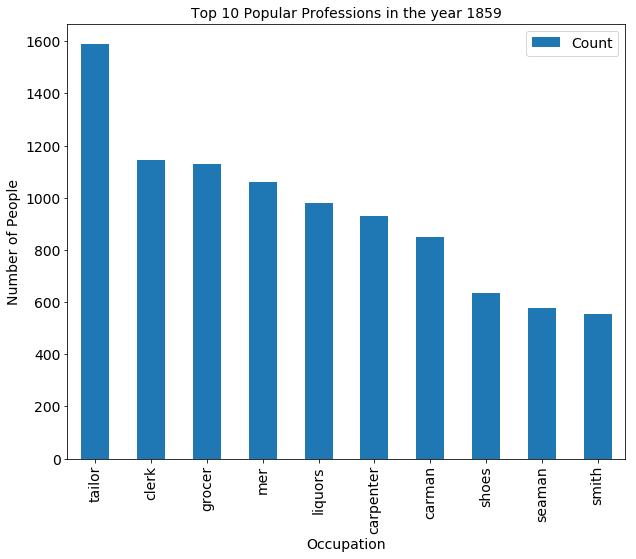

In [771]:
fig,ax= plt.subplots(figsize=(10,8))
df[df['validSince'] == 1859][['occupation','type']].groupby(['occupation']).count().sort_values(by='type',ascending=False)[1:11].plot(kind='bar',ax=ax)

plt.xlabel('Occupation',fontsize=14.0)
plt.ylabel('Number of People',fontsize=14.0)

plt.xticks(fontsize=14.0)
plt.yticks(fontsize=14.0)
plt.title('Top 10 Popular Professions in the year 1859', fontsize=14.0)
plt.legend(['Count'],fontsize=14.0)
plt.savefig('occ_1859.png')

In [97]:
namesdf = pd.DataFrame(df.name.dropna().str.split(' ',1).tolist(),columns=['Last Name', 'First Name'])

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


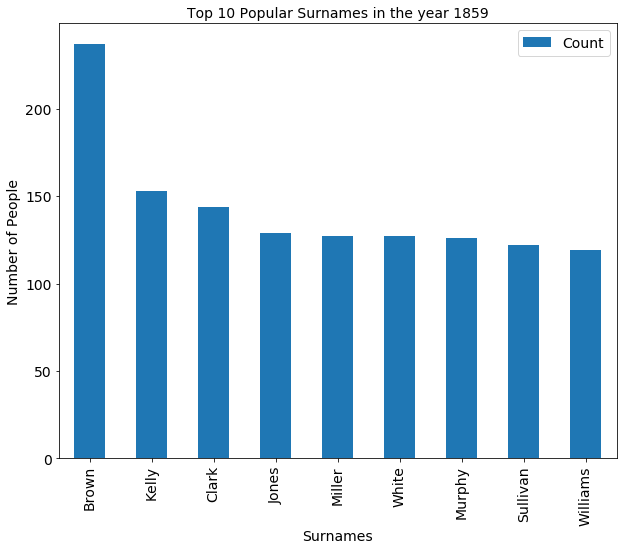

In [740]:
fig,ax= plt.subplots(figsize=(10,8))
namesdf[df['validSince'] == 1859].groupby(['Last Name']).count().sort_values(by='First Name',ascending=False)[1:10].plot(kind='bar',ax=ax)
plt.xlabel('Surnames',fontsize=14.0)
plt.ylabel('Number of People',fontsize=14.0)

plt.xticks(fontsize=14.0)
plt.yticks(fontsize=14.0)
plt.title('Top 10 Popular Surnames in the year 1859', fontsize=14.0)
plt.legend(['Count'],fontsize=14.0)
plt.savefig('sur_1859')                                                                                                                        
                                                                                                                        

In [12]:
occ_gdf = gpd.GeoDataFrame(df)

In [52]:
df.columns

Index(['Unnamed: 0', 'type', 'name', 'validSince', 'validUntil', 'geometry',
       'occupation', 'street_name'],
      dtype='object')

In [42]:
longitude = [ point.split(' ')[1][1:] for point in df.geometry.values.tolist()]

In [43]:
latitude = [ point.split(' ')[2][:-1] for point in df.geometry.values.tolist()]

In [53]:
long_df = pd.DataFrame(longitude,columns=['longitude'])
lat_df = pd.DataFrame(latitude,columns=['latitude'])
coords = pd.concat([df.iloc[:,1:9],long_df,lat_df],axis=1)

In [54]:
coords_gpd = gpd.GeoDataFrame(coords) 

In [55]:
coords_gpd['longitude'] = coords_gpd['longitude'].astype(float)
coords_gpd['latitude'] = coords_gpd['latitude'].astype(float)

In [56]:
coords_gpd['lonlat'] = list(zip(coords_gpd.longitude,coords_gpd.latitude ))

In [57]:
coords_gpd['geometry'] = coords_gpd[['lonlat']].dropna().applymap(lambda x:Point(x))

In [58]:
from fiona.crs import from_epsg
coords_gpd.crs = from_epsg(4326)

In [59]:

coords_gpd.to_crs(epsg=2263, inplace=True)

In [177]:
gdf.to_crs(epsg=2263, inplace=True)

In [178]:
sj_output = gpd.sjoin(coords_gpd,gdf,how='inner')

In [179]:
sj_output2 = gpd.sjoin(gdf,coords_gpd,how='inner')

In [745]:
sj_output2.shape

(448625, 18)

In [746]:
namesdf = pd.DataFrame(sj_output2.name.dropna().str.split(' ',1).tolist(),columns=['Last Name', 'First Name'])

In [747]:
namesdf.shape

(448222, 2)

In [ ]:
pd.concat[]

In [ ]:
sj_output2[sj_output2['validSince'] == 1859]

In [181]:
df_50 = sj_output2[sj_output2['validSince'] == 1850]

In [217]:
df_51 = sj_output2[sj_output2['validSince'] == 1851]

In [237]:
df_52 = sj_output2[sj_output2['validSince'] == 1852]
df_53 = sj_output2[sj_output2['validSince'] == 1853]
df_54 = sj_output2[sj_output2['validSince'] == 1854]
df_55 = sj_output2[sj_output2['validSince'] == 1855]
df_56 = sj_output2[sj_output2['validSince'] == 1856]
df_57 = sj_output2[sj_output2['validSince'] == 1857]
df_58 = sj_output2[sj_output2['validSince'] == 1858]
df_59 = sj_output2[sj_output2['validSince'] == 1859]

In [187]:
gdf1_ = gdf.merge(df_50[['ntacode','occupation']].groupby(['ntacode']).count(),left_index=True,right_index=True)


In [372]:
gdf1_['occupation'] = (gdf1_['occupation'] - gdf1_['occupation'].mean()) / gdf1_['occupation'].std()

In [388]:
gdf2_ = gdf.merge(df_51[['ntacode','occupation']].groupby(['ntacode']).count(),left_index=True,right_index=True)


In [389]:
gdf2_['occupation'] = (gdf2_['occupation'] - gdf2_['occupation'].mean()) / gdf2_['occupation'].std()
gdf3_['occupation'] = (gdf3_['occupation'] - gdf3_['occupation'].mean()) / gdf3_['occupation'].std()
gdf4_['occupation'] = (gdf4_['occupation'] - gdf4_['occupation'].mean()) / gdf4_['occupation'].std()
gdf5_['occupation'] = (gdf5_['occupation'] - gdf5_['occupation'].mean()) / gdf5_['occupation'].std()
gdf6_['occupation'] = (gdf6_['occupation'] - gdf6_['occupation'].mean()) / gdf6_['occupation'].std()

gdf7_['occupation'] = (gdf7_['occupation'] - gdf7_['occupation'].mean()) / gdf7_['occupation'].std()
gdf8_['occupation'] = (gdf8_['occupation'] - gdf8_['occupation'].mean()) / gdf8_['occupation'].std()
gdf9_['occupation'] = (gdf9_['occupation'] - gdf9_['occupation'].mean()) / gdf9_['occupation'].std()
gdf10_['occupation'] = (gdf10_['occupation'] - gdf10_['occupation'].mean()) / gdf10_['occupation'].std()


In [238]:
gdf3_ = gdf.merge(df_52[['ntacode','occupation']].groupby(['ntacode']).count(),left_index=True,right_index=True)
gdf4_ = gdf.merge(df_53[['ntacode','occupation']].groupby(['ntacode']).count(),left_index=True,right_index=True)
gdf5_ = gdf.merge(df_54[['ntacode','occupation']].groupby(['ntacode']).count(),left_index=True,right_index=True)
gdf6_ = gdf.merge(df_55[['ntacode','occupation']].groupby(['ntacode']).count(),left_index=True,right_index=True)
gdf7_ = gdf.merge(df_56[['ntacode','occupation']].groupby(['ntacode']).count(),left_index=True,right_index=True)
gdf8_ = gdf.merge(df_57[['ntacode','occupation']].groupby(['ntacode']).count(),left_index=True,right_index=True)
gdf9_ = gdf.merge(df_58[['ntacode','occupation']].groupby(['ntacode']).count(),left_index=True,right_index=True)
gdf10_ = gdf.merge(df_59[['ntacode','occupation']].groupby(['ntacode']).count(),left_index=True,right_index=True)


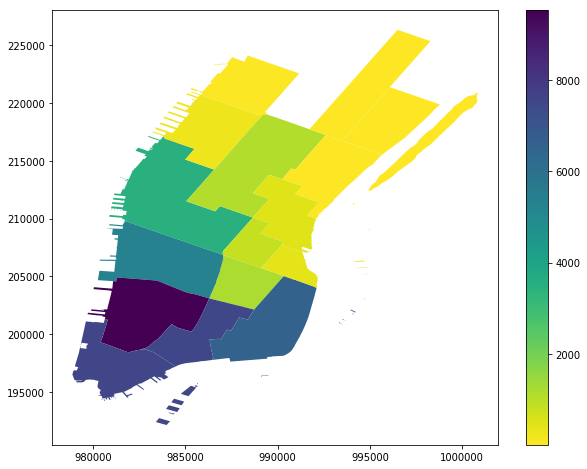

In [243]:
fig,ax = plt.subplots(figsize=(10,8))
gdf7_.plot(column='occupation',cmap='viridis_r',ax=ax,legend=True)
plt.legend()

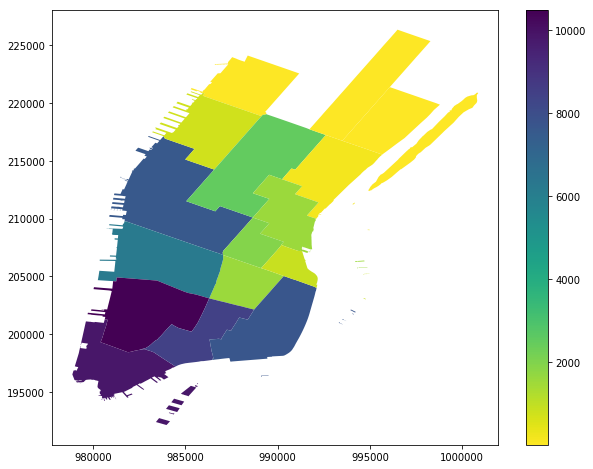

In [242]:
fig,ax = plt.subplots(figsize=(10,8))
gdf6_.plot(column='occupation',cmap='viridis_r',ax=ax,legend=True)
plt.legend()

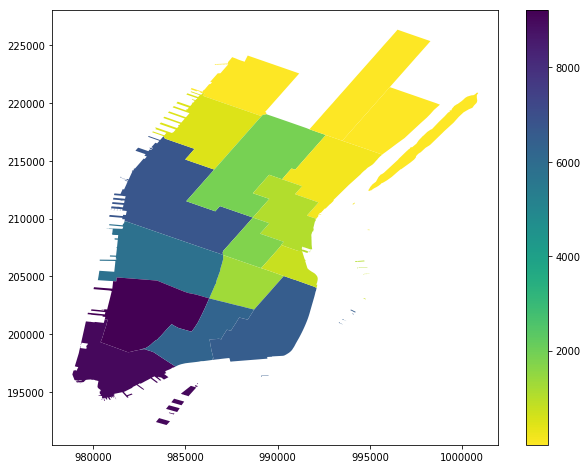

In [241]:
fig,ax = plt.subplots(figsize=(10,8))
gdf5_.plot(column='occupation',cmap='viridis_r',ax=ax,legend=True)
plt.legend()

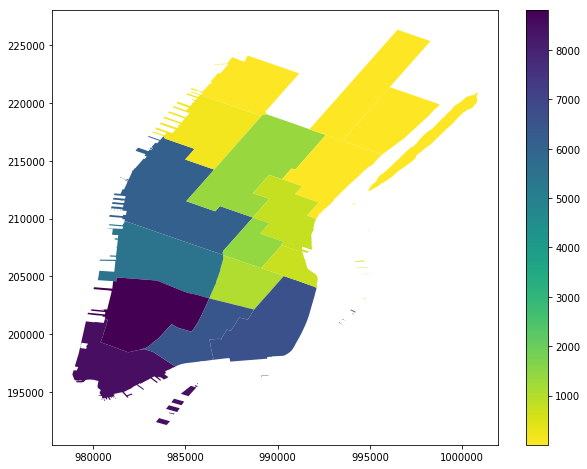

In [240]:
fig,ax = plt.subplots(figsize=(10,8))
gdf4_.plot(column='occupation',cmap='viridis_r',ax=ax,legend=True)
plt.legend()

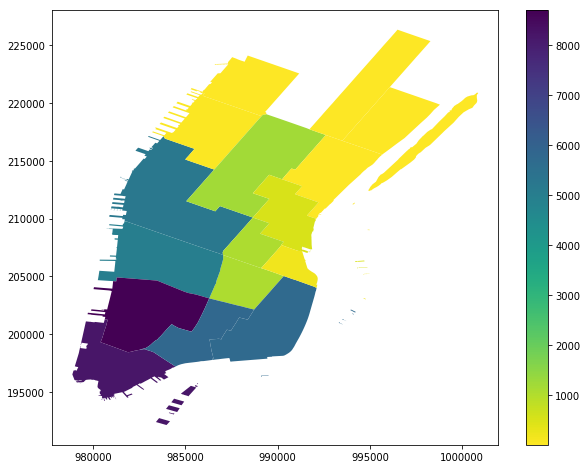

In [239]:
fig,ax = plt.subplots(figsize=(10,8))
gdf3_.plot(column='occupation',cmap='viridis_r',ax=ax,legend=True)
plt.legend()

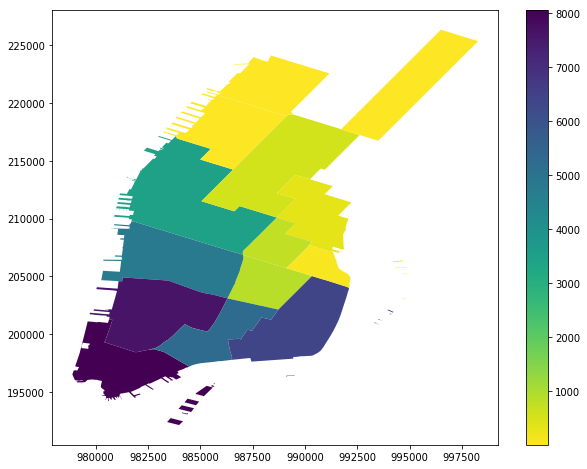

In [220]:
fig,ax = plt.subplots(figsize=(10,8))
gdf2_.plot(column='occupation',cmap='viridis_r',ax=ax,legend=True)
plt.legend()

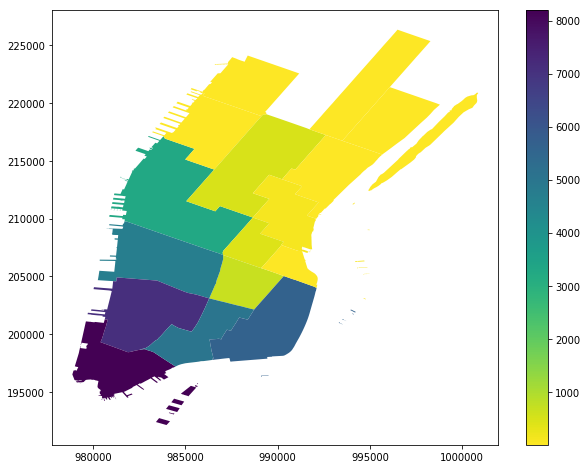

In [188]:
fig,ax = plt.subplots(figsize=(10,8))
gdf1_.plot(column='occupation',cmap='viridis_r',ax=ax,legend=True)
plt.legend()

In [193]:
import pysal as ps

In [525]:
path='gdf50.shp'
gdf1_.to_file(path)

In [582]:
path='gdf51.shp'
gdf2_.to_file(path)

In [605]:
path='gdf52.shp'
gdf3_.to_file(path)

In [617]:
path='gdf53.shp'
gdf4_.to_file(path)

In [630]:
path='gdf54.shp'
gdf5_.to_file(path)

In [670]:
path='gdf55.shp'
gdf6_.to_file(path)

In [655]:
path='gdf56.shp'
gdf7_.to_file(path)

In [683]:
path='gdf57.shp'
gdf8_.to_file(path)

In [697]:
path='gdf58.shp'
gdf9_.to_file(path)

In [710]:
path='gdf59.shp'
gdf10_.to_file(path)

In [711]:
qW_CT=ps.queen_from_shapefile(path)

In [712]:
Wmatrix, ids = qW_CT.full()


In [713]:
qW_CT.transform = 'r'


In [715]:
total_business = gdf10_.occupation
total_businessLag =ps.lag_spatial(qW_CT, total_business)


In [716]:
total_businessQ10 = ps.Quantiles(total_businessLag, k=10)
total_businessQ10


               Quantiles               
 
Lower            Upper            Count
         x[i] <= -0.707               2
-0.707 < x[i] <= -0.604               2
-0.604 < x[i] <= -0.526               1
-0.526 < x[i] <= -0.359               2
-0.359 < x[i] <= -0.271               1
-0.271 < x[i] <= -0.131               2
-0.131 < x[i] <=  0.344               1
 0.344 < x[i] <=  0.646               2
 0.646 < x[i] <=  0.850               1
 0.850 < x[i] <=  1.767               2

In [717]:
I_total_business = ps.Moran(total_business, qW_CT)

In [718]:
I_total_business.I, I_total_business.p_sim

(0.58104939848752124, 0.001)

In [719]:
LMo_MonthlyRide = ps.Moran_Local(total_business.values, qW_CT ,permutations=999)

In [720]:
sigs = total_business[LMo_MonthlyRide.p_sim <= .001]
W_sigs = total_business[LMo_MonthlyRide.p_sim <= .001]
insigs = total_business[LMo_MonthlyRide.p_sim > .001]
W_insigs = total_business[LMo_MonthlyRide.p_sim > .001]


In [721]:
sig = LMo_MonthlyRide.p_sim < 0.01
hotspots = LMo_MonthlyRide.q==1 * sig
coldspots = LMo_MonthlyRide.q==3 * sig

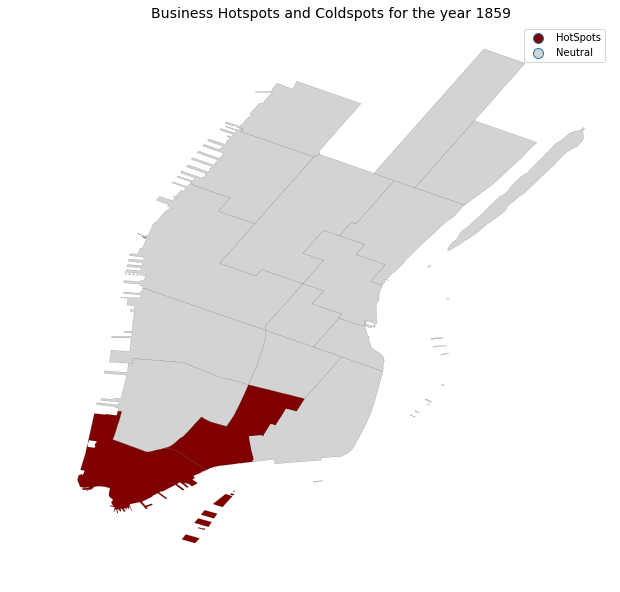

In [723]:
from matplotlib import colors

hcmap = colors.ListedColormap(['maroon','lightgrey'])
hotcold = hotspots*1 + coldspots*2
HotCold_Categories2=[]
for i in range(len(hotcold)):
    if hotcold[i] == 0:
        HotCold_Categories2.append('Neutral')
    elif hotcold[i] == 1:
        HotCold_Categories2.append('HotSpots')
    else:
        HotCold_Categories2.append('ColdSpots')
        
    

f, ax = plt.subplots(figsize=(10,10))

gdf10_.assign(cl=HotCold_Categories2).plot(column='cl', categorical=True, 
        k=2, cmap=hcmap, linewidth=0.1, ax=ax, 
        edgecolor='black',legend=True)
ax.set_axis_off()

plt.title("Business Hotspots and Coldspots for the year 1859",fontsize=14.0);

plt.savefig('f59.png')

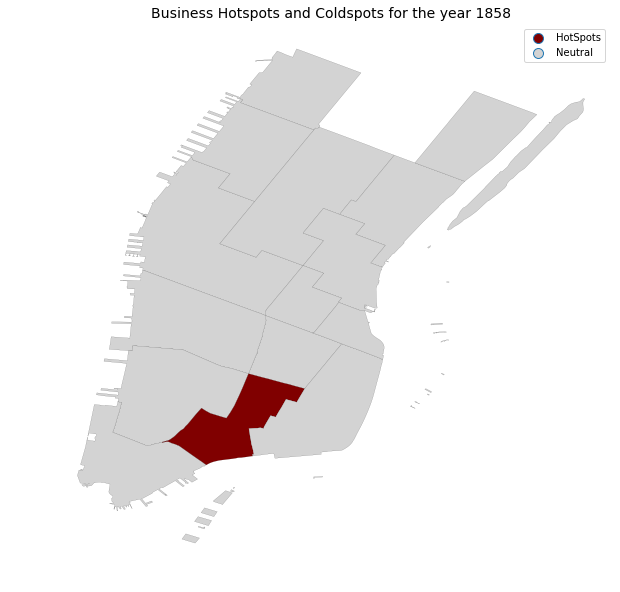

In [709]:
from matplotlib import colors

hcmap = colors.ListedColormap(['maroon','lightgrey'])
hotcold = hotspots*1 + coldspots*2
HotCold_Categories2=[]
for i in range(len(hotcold)):
    if hotcold[i] == 0:
        HotCold_Categories2.append('Neutral')
    elif hotcold[i] == 1:
        HotCold_Categories2.append('HotSpots')
    else:
        HotCold_Categories2.append('ColdSpots')
        
    

f, ax = plt.subplots(figsize=(10,10))

gdf9_.assign(cl=HotCold_Categories2).plot(column='cl', categorical=True, 
        k=2, cmap=hcmap, linewidth=0.1, ax=ax, 
        edgecolor='black',legend=True)
ax.set_axis_off()

plt.title("Business Hotspots and Coldspots for the year 1858",fontsize=14.0);

plt.savefig('f58.png')

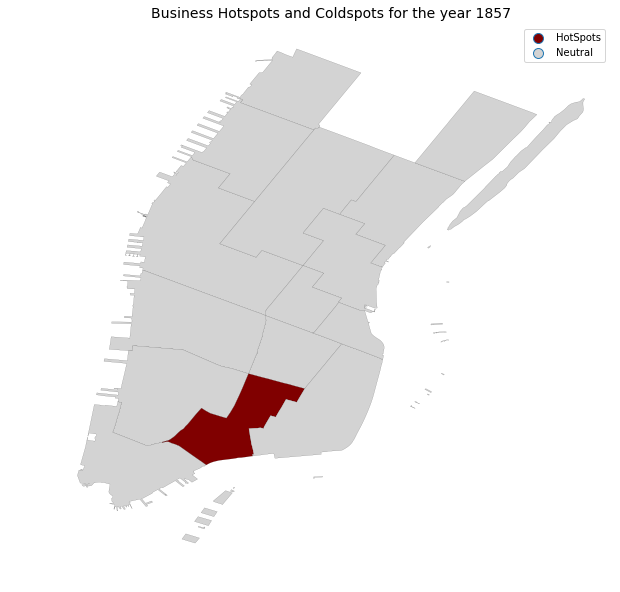

In [696]:
from matplotlib import colors

hcmap = colors.ListedColormap(['maroon','lightgrey'])
hotcold = hotspots*1 + coldspots*2
HotCold_Categories2=[]
for i in range(len(hotcold)):
    if hotcold[i] == 0:
        HotCold_Categories2.append('Neutral')
    elif hotcold[i] == 1:
        HotCold_Categories2.append('HotSpots')
    else:
        HotCold_Categories2.append('ColdSpots')
        
    

f, ax = plt.subplots(figsize=(10,10))

gdf8_.assign(cl=HotCold_Categories2).plot(column='cl', categorical=True, 
        k=2, cmap=hcmap, linewidth=0.1, ax=ax, 
        edgecolor='black',legend=True)
ax.set_axis_off()

plt.title("Business Hotspots and Coldspots for the year 1857",fontsize=14.0);

plt.savefig('f57.png')

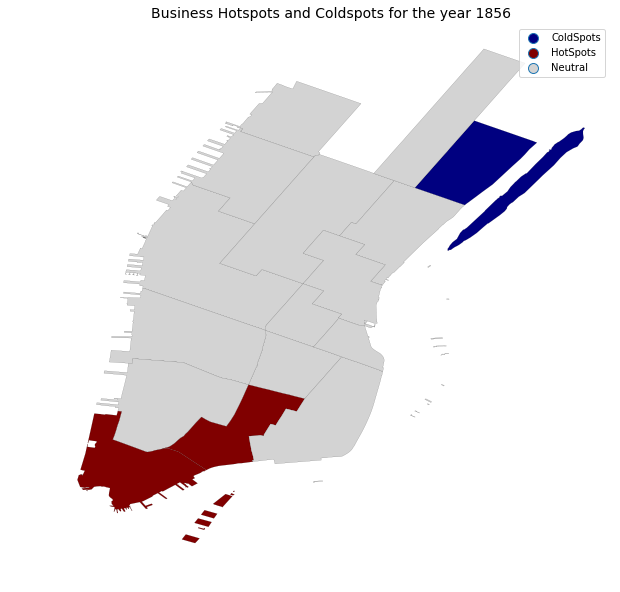

In [669]:
from matplotlib import colors

hcmap = colors.ListedColormap(['navy','maroon','lightgrey'])
hotcold = hotspots*1 + coldspots*2
HotCold_Categories2=[]
for i in range(len(hotcold)):
    if hotcold[i] == 0:
        HotCold_Categories2.append('Neutral')
    elif hotcold[i] == 1:
        HotCold_Categories2.append('HotSpots')
    else:
        HotCold_Categories2.append('ColdSpots')
        
    

f, ax = plt.subplots(figsize=(10,10))

gdf7_.assign(cl=HotCold_Categories2).plot(column='cl', categorical=True, 
        k=2, cmap=hcmap, linewidth=0.1, ax=ax, 
        edgecolor='black',legend=True)
ax.set_axis_off()

plt.title("Business Hotspots and Coldspots for the year 1856",fontsize=14.0);

plt.savefig('f56.png')

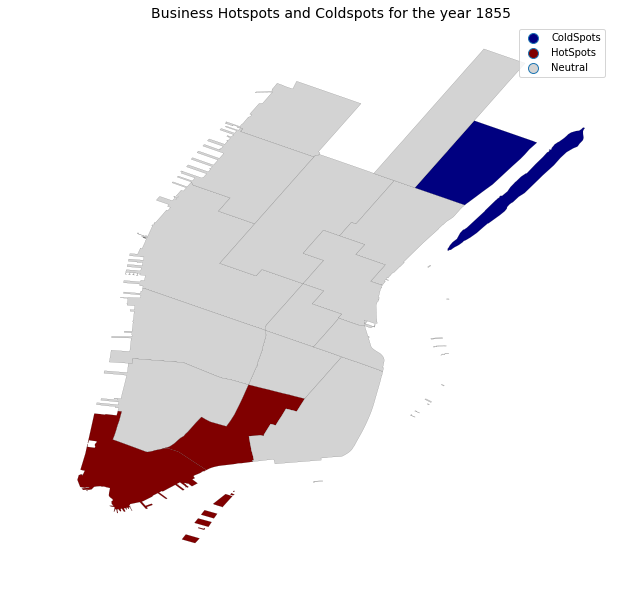

In [682]:
from matplotlib import colors

hcmap = colors.ListedColormap(['navy','maroon','lightgrey'])
hotcold = hotspots*1 + coldspots*2
HotCold_Categories2=[]
for i in range(len(hotcold)):
    if hotcold[i] == 0:
        HotCold_Categories2.append('Neutral')
    elif hotcold[i] == 1:
        HotCold_Categories2.append('HotSpots')
    else:
        HotCold_Categories2.append('ColdSpots')
        
    

f, ax = plt.subplots(figsize=(10,10))

gdf6_.assign(cl=HotCold_Categories2).plot(column='cl', categorical=True, 
        k=2, cmap=hcmap, linewidth=0.1, ax=ax, 
        edgecolor='black',legend=True)
ax.set_axis_off()

plt.title("Business Hotspots and Coldspots for the year 1855",fontsize=14.0);

plt.savefig('f55.png')

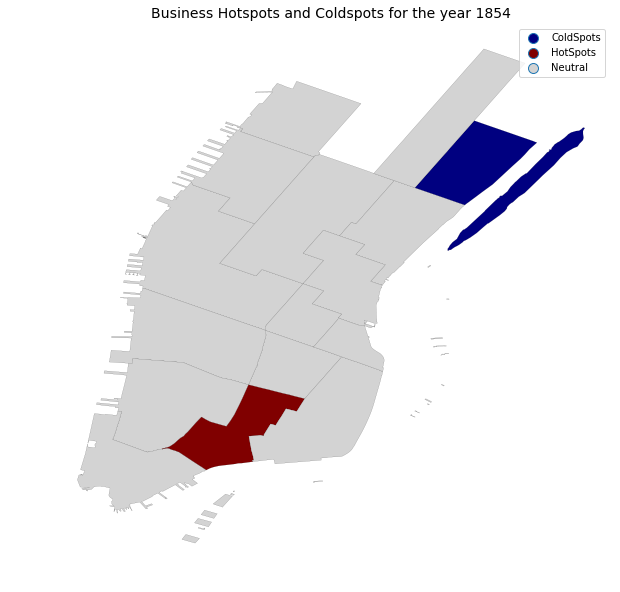

In [641]:
from matplotlib import colors

hcmap = colors.ListedColormap(['navy','maroon','lightgrey'])
hotcold = hotspots*1 + coldspots*2
HotCold_Categories2=[]
for i in range(len(hotcold)):
    if hotcold[i] == 0:
        HotCold_Categories2.append('Neutral')
    elif hotcold[i] == 1:
        HotCold_Categories2.append('HotSpots')
    else:
        HotCold_Categories2.append('ColdSpots')
        
    

f, ax = plt.subplots(figsize=(10,10))

gdf5_.assign(cl=HotCold_Categories2).plot(column='cl', categorical=True, 
        k=2, cmap=hcmap, linewidth=0.1, ax=ax, 
        edgecolor='black',legend=True)
ax.set_axis_off()

plt.title("Business Hotspots and Coldspots for the year 1854",fontsize=14.0);

plt.savefig('f54.png')

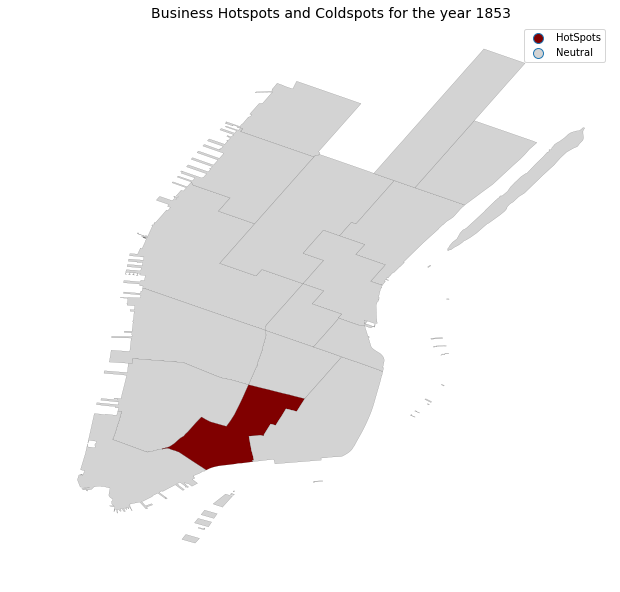

In [629]:
from matplotlib import colors

hcmap = colors.ListedColormap(['maroon','lightgrey'])
hotcold = hotspots*1 + coldspots*2
HotCold_Categories2=[]
for i in range(len(hotcold)):
    if hotcold[i] == 0:
        HotCold_Categories2.append('Neutral')
    elif hotcold[i] == 1:
        HotCold_Categories2.append('HotSpots')
    else:
        HotCold_Categories2.append('ColdSpots')
        
    

f, ax = plt.subplots(figsize=(10,10))

gdf4_.assign(cl=HotCold_Categories2).plot(column='cl', categorical=True, 
        k=2, cmap=hcmap, linewidth=0.1, ax=ax, 
        edgecolor='black',legend=True)
ax.set_axis_off()

plt.title("Business Hotspots and Coldspots for the year 1853",fontsize=14.0);

plt.savefig('f53.png')

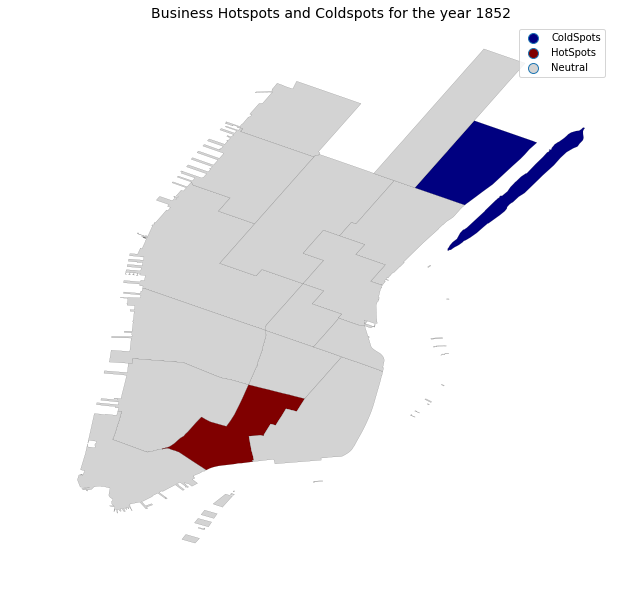

In [616]:
from matplotlib import colors

hcmap = colors.ListedColormap(['navy','maroon','lightgrey'])
hotcold = hotspots*1 + coldspots*2
HotCold_Categories2=[]
for i in range(len(hotcold)):
    if hotcold[i] == 0:
        HotCold_Categories2.append('Neutral')
    elif hotcold[i] == 1:
        HotCold_Categories2.append('HotSpots')
    else:
        HotCold_Categories2.append('ColdSpots')
        
    

f, ax = plt.subplots(figsize=(10,10))

gdf3_.assign(cl=HotCold_Categories2).plot(column='cl', categorical=True, 
        k=2, cmap=hcmap, linewidth=0.1, ax=ax, 
        edgecolor='black',legend=True)
ax.set_axis_off()

plt.title("Business Hotspots and Coldspots for the year 1852",fontsize=14.0);

plt.savefig('f52.png')

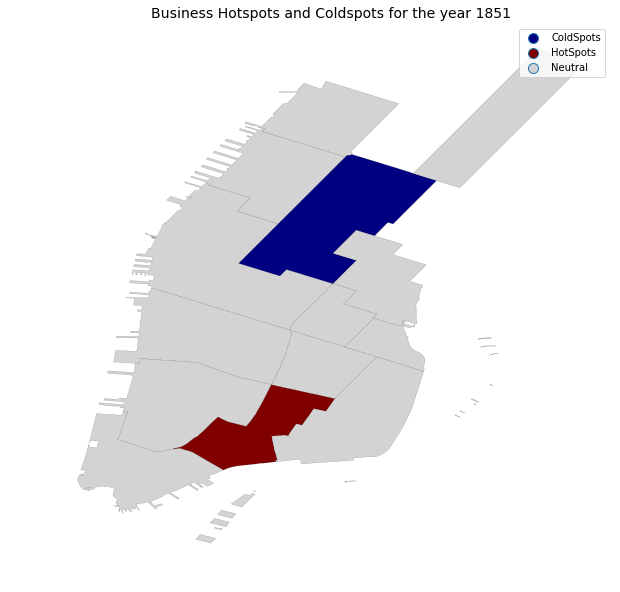

In [604]:
from matplotlib import colors

hcmap = colors.ListedColormap(['navy','maroon','lightgrey'])
hotcold = hotspots*1 + coldspots*2
HotCold_Categories2=[]
for i in range(len(hotcold)):
    if hotcold[i] == 0:
        HotCold_Categories2.append('Neutral')
    elif hotcold[i] == 1:
        HotCold_Categories2.append('HotSpots')
    else:
        HotCold_Categories2.append('ColdSpots')
        
    

f, ax = plt.subplots(figsize=(10,10))

gdf2_.assign(cl=HotCold_Categories2).plot(column='cl', categorical=True, 
        k=2, cmap=hcmap, linewidth=0.1, ax=ax, 
        edgecolor='black',legend=True)
ax.set_axis_off()

plt.title("Business Hotspots and Coldspots for the year 1851",fontsize=14.0);

plt.savefig('f51.png')

In [597]:
HotCold_Categories2

['Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Hotspots',
 'Neutral',
 'Neutral',
 'Neutral']

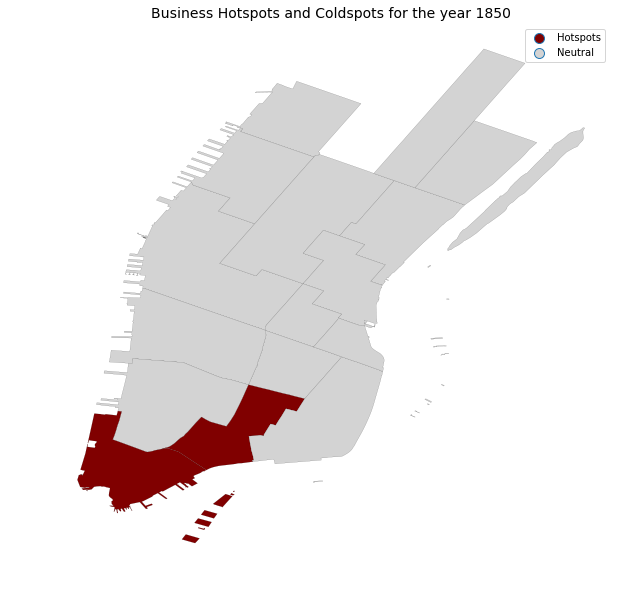

In [581]:
from matplotlib import colors

hcmap = colors.ListedColormap(['maroon','lightgrey'])
hotcold = hotspots*1 + coldspots*2
HotCold_Categories2=[]
for i in range(len(hotcold)):
    if hotcold[i] == 0:
        HotCold_Categories2.append('Neutral')
    elif hotcold[i] == 1:
        HotCold_Categories2.append('Hotspots')
        
    

f, ax = plt.subplots(figsize=(10,10))

gdf1_.assign(cl=HotCold_Categories2).plot(column='cl', categorical=True, 
        k=2, cmap=hcmap, linewidth=0.1, ax=ax, 
        edgecolor='black',legend=True)
ax.set_axis_off()

plt.title("Business Hotspots and Coldspots for the year 1850",fontsize=14.0);

plt.savefig('f50.png')

In [748]:
sj3 = sj_output2.dropna()

In [749]:
sj3.reset_index(inplace=True)

In [750]:
df3 = pd.concat([sj3,names],axis=1)

In [753]:
df3.head()

,index,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry,index_right,...,name,validSince,validUntil,occupation,street_name,longitude,latitude,lonlat,Last Name,First Name
0,13,1.0,Manhattan,061,MN19,Turtle Bay-East Midtown,1.739327e+07,21412.598185,"(POLYGON ((994988.9536132818 209035.27239985, ...",286030,...,Bell George W,1856,1857,carpenter,Third Avenue,-73.968996,40.757988,"(-73.9689955115, 40.7579879323)",Bell,George W
1,13,1.0,Manhattan,061,MN19,Turtle Bay-East Midtown,1.739327e+07,21412.598185,"(POLYGON ((994988.9536132818 209035.27239985, ...",202185,...,Lynch John,1854,1855,shipcarpenter,Third Avenue,-73.968996,40.757988,"(-73.9689955115, 40.7579879323)",Lynch,John
2,13,1.0,Manhattan,061,MN19,Turtle Bay-East Midtown,1.739327e+07,21412.598185,"(POLYGON ((994988.9536132818 209035.27239985, ...",426831,...,Carter Josiah,1859,1860,police,Third Avenue,-73.968996,40.757988,"(-73.9689955115, 40.7579879323)",Carter,Josiah
3,13,1.0,Manhattan,061,MN19,Turtle Bay-East Midtown,1.739327e+07,21412.598185,"(POLYGON ((994988.9536132818 209035.27239985, ...",325553,...,Harrison George M,1857,1858,engineer,Third Avenue,-73.968996,40.757988,"(-73.9689955115, 40.7579879323)",Harrison,George M
4,13,1.0,Manhattan,061,MN19,Turtle Bay-East Midtown,1.739327e+07,21412.598185,"(POLYGON ((994988.9536132818 209035.27239985, ...",161759,...,Patten John,1853,1854,smith,Third Avenue,-73.968996,40.757988,"(-73.9689955115, 40.7579879323)",Patten,John


In [764]:
gdf_occ_tailor = gdf.merge(df3[['occupation', 'ntacode']][df3['occupation'] == 'tailor'].groupby('ntacode').count(),left_index=True,right_index=True)


In [769]:
sum_tailor = gdf_occ_tailor['occupation'].sum()
gdf_occ_tailor['occupation'] = gdf_occ_tailor['occupation'] / sum_tailor

In [776]:
gdf_name_james = gdf.merge(df3[['Last Name', 'ntacode']][df3['Last Name'] == 'Brown'].groupby('ntacode').count(),left_index=True,right_index=True)


In [777]:
sum_james = gdf_name_james['Last Name'].sum()
gdf_name_james['Last Name'] = gdf_name_james['Last Name'] / sum_james

In [80]:
gdf_occ_lab = gdf.merge(sj_output2[['occupation', 'ZIPCODE']][sj_output2['occupation'] == 'laborer'].groupby('ZIPCODE').count(),left_index=True,right_index=True)


In [86]:
gdf_occ_law = gdf.merge(sj_output2[['occupation', 'ZIPCODE']][sj_output2['occupation'] == 'lawyer'].groupby('ZIPCODE').count(),left_index=True,right_index=True)

In [90]:
sj_output2[['name', 'ZIPCODE']][sj_output2['name'] == 'James'].groupby('ZIPCODE').count()

,name
ZIPCODE,
10002,2
10006,2
10009,1
10011,1
10012,2
10013,2
10016,1
10038,1


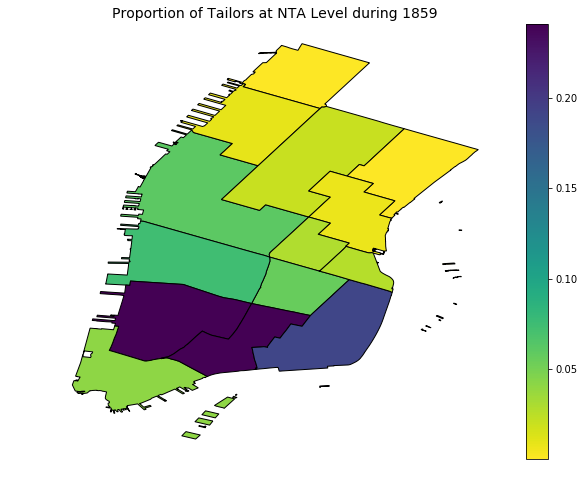

In [770]:
fig,ax = plt.subplots(figsize=(10,8))
gdf_occ_tailor.plot(column='occupation',cmap='viridis_r',ax=ax,legend=True,edgecolor='black')
plt.title("Proportion of Tailors at NTA Level during 1859",fontsize=14.0);
ax.set_axis_off()
plt.legend()
plt.savefig('tailor.png')


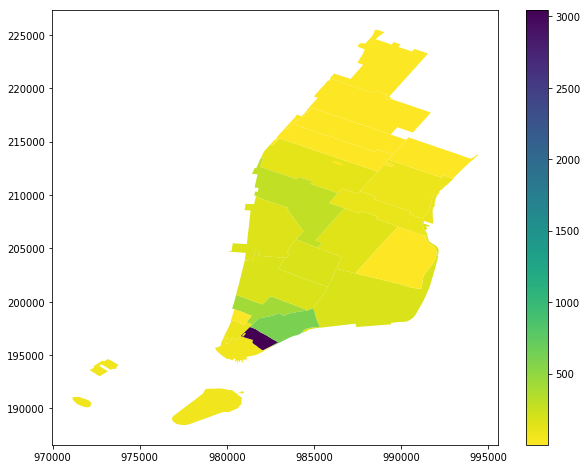

In [87]:
fig,ax = plt.subplots(figsize=(10,8))
gdf_occ_law.plot(column='occupation',cmap='viridis_r',ax=ax,legend=True)
plt.legend()

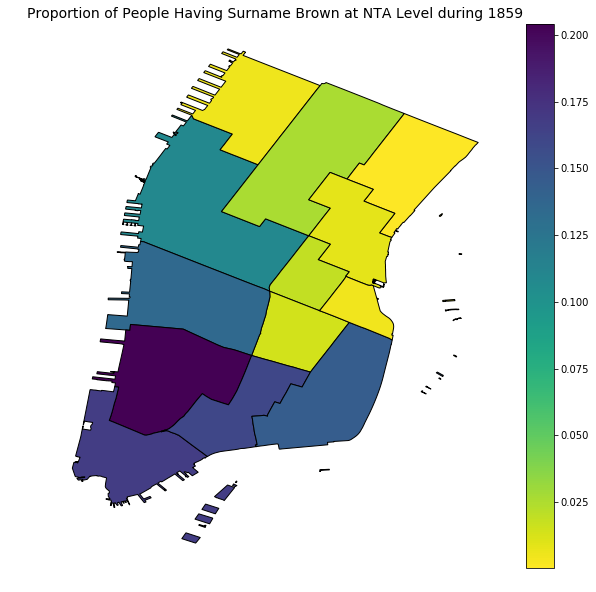

In [781]:
fig,ax = plt.subplots(figsize=(10,10))
gdf_name_james.plot(column='Last Name',cmap='viridis_r',ax=ax,legend=True,edgecolor='black')
plt.title("Proportion of People Having Surname Brown at NTA Level during 1859",fontsize=14.0);
ax.set_axis_off()
plt.legend()
plt.savefig('Brown.png')

### Work to go:
1. Identify hotspots and coldspots for laborers and lawyers for the two sets of decades.

In [524]:
import imageio

ImportError: No module named 'imageio'

/bin/sh: 1: zip: not found
